<a href="https://colab.research.google.com/github/nehamahanand07/Transfer_learning_1/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224] #bcz we using vgg image size and weights from vgg info

train_data='/content/drive/MyDrive/Maskdata'
test_data='/content/drive/MyDrive/Maskdatatest'


In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#MUst, we should not train so trainable=False
for i in vgg.layers:
  i.trainable=False

In [ ]:
#to flatten pooling layer output which is in vgg.output
x=Flatten()(vgg.output)
prediction=Dense(2,activation='softmax')(x)

#if needed hidden layer can be added before prediction, here time consuming



In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#to preprocess training data
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_data,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_data,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 3150 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [ ]:
r=model.fit(training_set,validation_data=testing_set,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
23/99 ━━━━━━━━━━━━━━━━━━━━ 7:24 6s/step - accuracy: 0.6856 - loss: 0.7970

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


99/99 ━━━━━━━━━━━━━━━━━━━━ 626s 6s/step - accuracy: 0.8376 - loss: 0.4129 - val_accuracy: 0.9804 - val_loss: 0.0578
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 545ms/step - accuracy: 0.9778 - loss: 0.0605 - val_accuracy: 0.9804 - val_loss: 0.0423
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 57s 572ms/step - accuracy: 0.9784 - loss: 0.0602 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 546ms/step - accuracy: 0.9876 - loss: 0.0381 - val_accuracy: 0.9902 - val_loss: 0.0130
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 54s 541ms/step - accuracy: 0.9965 - loss: 0.0200 - val_accuracy: 0.9902 - val_loss: 0.0164


In [ ]:
r.history

{'accuracy': [0.9212698340415955,
  0.9800000190734863,
  0.9793650507926941,
  0.986984133720398,
  0.9952380657196045],
 'loss': [0.20637178421020508,
  0.0596434585750103,
  0.05552545562386513,
  0.035423554480075836,
  0.02144792675971985],
 'val_accuracy': [0.9803921580314636,
  0.9803921580314636,
  1.0,
  0.9901960492134094,
  0.9901960492134094],
 'val_loss': [0.05777798965573311,
  0.04231027513742447,
  0.011736699379980564,
  0.012989027425646782,
  0.016390178352594376]}

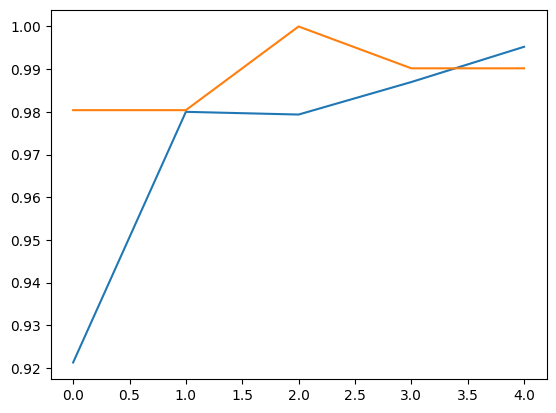

In [ ]:
plt.plot(r.history['accuracy'],label='Training data performance')
plt.plot(r.history['val_accuracy'],label='Testing data performance')

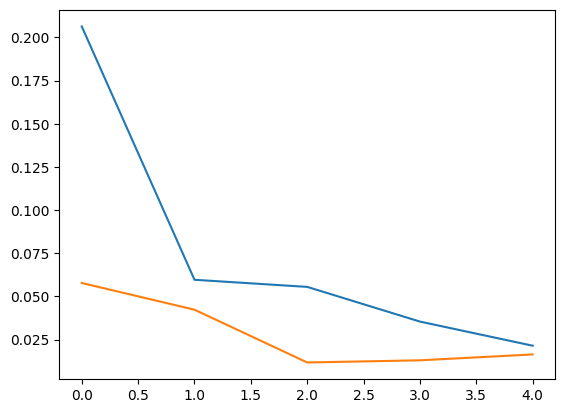

In [ ]:
plt.plot(r.history['loss'],label='Trainig data loss')
plt.plot(r.history['val_loss'],label='Testing data loss')

In [ ]:
#predicting with a new image
from skimage.io import imread
from skimage.transform import resize



In [ ]:
def predict_img(imgpath,model):
  img=imread(imgpath)
  img_resized=resize(img,(224,224))
  # print(img_resized.shape)
  img_resized=img_resized.reshape(1,224,224,3) #extra reshape adding
  pred=model.predict(img_resized)
  print(pred)
  ind=pred.argmax()
  print(ind)
  datadir=['without_mask','with_mask']
  datadir.sort()
  print(datadir[ind])


In [ ]:
imgpath='/content/drive/MyDrive/Maskdatatest/with_mask/103-with-mask.jpg'
predict_img(imgpath,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[9.9997628e-01 2.3776807e-05]]
0
with_mask


In [ ]:
#saving model
model.save('model_transfer_learning_mask.h5')